In [13]:
import navis 
import navis.interfaces.neuprint as neu
import NeuromodPlasticity as nmp 

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
c = nmp.connectomics.npt_client()

In [15]:
eb, pb, gall = neu.fetch_roi("EB"), neu.fetch_roi("PB"), neu.fetch_roi("GA(R)")

In [24]:
epgs,_ = neu.queries.fetch_neurons(neu.NeuronCriteria(type='EPG'))
l_epg_inst, r_epg_inst = [], []
for inst in np.sort(epgs['instance'].unique()):
    if 'EPG(PB08)_L' in inst:
        l_epg_inst.append(inst)
    elif 'EPG(PB08)_R' in inst:
        r_epg_inst.append(inst)
r_epg_inst = r_epg_inst[::-1]

epg_cmap = plt.get_cmap('rainbow', len(l_epg_inst))
epg_colors = {}
for i, (l_inst, r_inst) in enumerate(zip(l_epg_inst, r_epg_inst)):
    epg_colors[l_inst] = epg_cmap(i)
    epg_colors[r_inst] = epg_cmap(i)
epgs['color'] = epgs['instance'].map(epg_colors)




pens, _ = neu.queries.fetch_neurons(neu.NeuronCriteria(type='PEN_a.*'))
l_pens_inst, r_pens_inst = [], []
for inst in np.sort(pens['instance'].unique()):
    if 'PEN_a(PB06a)_L' in inst:
        l_pens_inst.append(inst)
    elif 'PEN_a(PB06a)_R' in inst:
        r_pens_inst.append(inst)

r_pens_inst = r_pens_inst[::-1]
pen_cmap = plt.get_cmap('rainbow', len(l_pens_inst))
pen_colors = {}
for i, (l_inst, r_inst) in enumerate(zip(l_pens_inst, r_pens_inst)):
    pen_colors[l_inst] = pen_cmap(i)
    pen_colors[r_inst] = pen_cmap(i)
pens['color'] = pens['instance'].map(pen_colors)






# specify epg and pen colormaps
# reverse order for right hemisphere


Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/9 [00:00<?, ?it/s]

        bodyId         type         instance
6    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
7    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
13   757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
16   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
17   849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
21  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
24  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
25  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
28  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


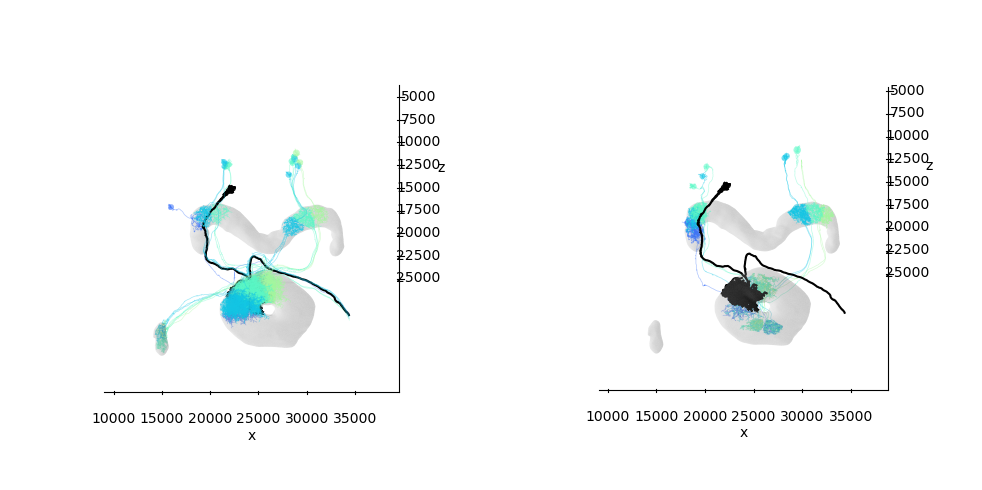

In [ ]:
# get el neurons


# for each el
els_df, _ = neu.queries.fetch_neurons(neu.NeuronCriteria(type = 'EL'))
els_df.head()

for i, el in els_df.iloc[2:3].iterrows():
    
    # get all presynaptic EPGs and PENs
    pre_neurons, _ = neu.queries.fetch_adjacencies(
                                sources = neu.NeuronCriteria(type = ['EPG', 'PEN_a.*', 'PEN_b.*',]), 
                                targets = [el['bodyId']],
                                rois=['EB'],
                                min_total_weight=3,
                                )
    
    pre_epgs = pre_neurons[pre_neurons['type'] == 'EPG']
    pre_epg_skeletons = neu.fetch_skeletons(pre_epgs['bodyId'])
    el_skeleton = neu.fetch_skeletons(el['bodyId'])

    fig = plt.figure(figsize=(10, 5))
    ax = [fig.add_subplot(121, projection='3d'), fig.add_subplot(122, projection='3d')]
    
    colors = []
    for i, pre_epg in pre_epgs.iterrows():
        # print(pre_epg)
        if pre_epg['instance'] in epg_colors:
            colors.append(epg_colors[pre_epg['instance']])
        else:
            print('error')

    # colors.append((0, 1, 0))

    _ = navis.plot2d(
                    [*pre_epg_skeletons, eb, pb, gall],
                    method="3d",
                    connectors=False,
                    linewidth=0.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("x", "-z"),
                    alpha=0.4,
                    color=colors,
                    ax=ax[0]
                )

    _ = navis.plot2d(
                    [el_skeleton],
                    method="3d",
                    connectors=False,
                    linewidth=1.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("x", "-z"),
                    alpha=1,
                    color=((0,0,0)),
                    ax = ax[0],
                )

    ax[0].elev = -20
    ax[0].grid(False)

    # plt.tight_layout()


    pre_pens = pre_neurons[pre_neurons['type'].str.contains('PEN_a')]
    pre_pen_skeletons = neu.fetch_skeletons(pre_pens['bodyId'])
    print(pre_pens)

    colors = []
    for i, pre_pen in pre_pens.iterrows():
        # print(pre_pen)
        if pre_pen['instance'] in pen_colors:
            colors.append(pen_colors[pre_pen['instance']])
        else:
            colors.append((1, 0, 0))

    
    _ = navis.plot2d(
                    [*pre_pen_skeletons, eb, pb, gall],
                    method="3d",
                    connectors=False,
                    linewidth=0.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("x", "-z"),
                    alpha=0.4,
                    color=colors,
                    ax=ax[1]
                )

    _ = navis.plot2d(
                    [el_skeleton],
                    method="3d",
                    connectors=False,
                    linewidth=1.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("x", "-z"),
                    alpha=1,
                    color=((0,0,0)),
                    ax = ax[1],
                )

    ax[1].elev = -20
    ax[1].grid(False)

    plt.tight_layout()




# get all presynaptic EPG and PENs


# plot el with presynaptic EPGs, color EPGs by wedge

# plot el with presynaptic L PENs, color PENs by wedge

# plot el with presynaptic R PENs, color PENs by wedge






In [ ]:
# for each EL, calculate relative weight of EPG glomeruli and PEN glomeruli